# Tools

In [3]:
import h5py, numpy as np, tqdm, os, glob
from matplotlib import pyplot as plt

In [4]:
# %matplotlib widget
%matplotlib inline

# Data

In [5]:
ls /data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/

03_samples_2_6/  05_samples_M_655/  2021_nGI_BOA.rar


In [6]:
ls /data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/

boa2021n000458.hdf  boa2021n000468.hdf  boa2021n000479.hdf  boa2021n000489.hdf
boa2021n000460.hdf  boa2021n000470.hdf  boa2021n000481.hdf  boa2021n000491.hdf
boa2021n000462.hdf  boa2021n000472.hdf  boa2021n000483.hdf  boa2021n000494.hdf
boa2021n000464.hdf  boa2021n000474.hdf  boa2021n000485.hdf
boa2021n000466.hdf  boa2021n000477.hdf  boa2021n000487.hdf


In [7]:
obf = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/OB/boa2021n000476.hdf')
sample1f = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000460.hdf')

In [8]:
obdata = obf['entry']['data']['data']
sample1data = sample1f['entry']['data']['data']
obdata.shape

(11, 1024, 1024)

# Use the fast cos wave fitting method to obtain signals

In [9]:
def calcPhase(data, niter=5, dc=297.):
    data = np.array(data)-dc
    shape = data.shape[1:]
    o = np.zeros(shape)
    a_c = np.zeros(shape)
    a_s = np.zeros(shape)
    cp = np.cos(phi)
    sp = np.sin(phi)
    for i in range(niter):
        y = np.multiply.outer(cp, a_c) + np.multiply.outer(sp, a_s) + o[np.newaxis, :]
        o1 = o + np.mean((data-y), axis=0)
        a_s1 = np.mean((data-y)*sp[:, np.newaxis, np.newaxis], axis=0)*2 + a_s
        a_c1 = np.mean((data-y)*cp[:, np.newaxis, np.newaxis], axis=0)*2 + a_c
        o, a_s, a_c = o1, a_s1, a_c1
    return o, a_s, a_c

## Explore

In [10]:
obf = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/OB/boa2021n000476.hdf')
sample1f = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000460.hdf')

In [11]:
obdata = obf['entry']['data']['data']
sample1data = sample1f['entry']['data']['data']
obdata.shape

(11, 1024, 1024)

In [12]:
sgtz = sample1f['entry/table5/sgtz']

In [13]:
np.array(sgtz)

array([140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.],
      dtype=float32)

In [14]:
print("L (sample-grating distance)", 145-np.array(sgtz).mean()+6)

L (sample-grating distance) 11.0


In [15]:
# 11 points
i = np.arange(11.)
phi = i/11*np.pi*2

### Visibility and phase change

In [16]:
o1, a_s1, a_c1 = calcPhase(obdata, niter=1)
print(o1[500, 500], a_s1[500, 500], a_c1[500, 500], a_s1[500, 500]/a_c1[500, 500])
ob_phase = np.arctan2(-a_c1, a_s1)
ob_vis = np.sqrt(a_c1*a_c1+a_s1*a_s1)/o1

2673.7272727272725 -527.2042832258859 599.9326900077656 -0.87877238898094


In [17]:
o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
sample1_phase = np.arctan2(-a_c1, a_s1)
sample1_vis = a1/o1

### Plot phase

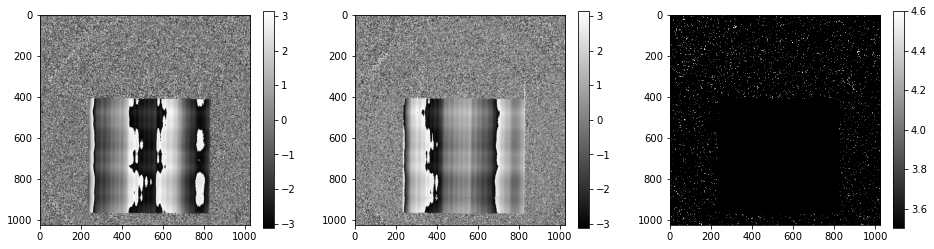

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.imshow(ob_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(sample1_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow((sample1_phase-ob_phase)%(2*np.pi), cmap='gray')
plt.clim(3.5, 4.6)
plt.colorbar()

### Plot Dark field

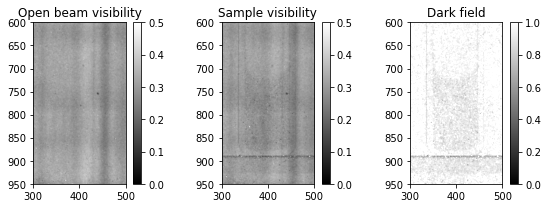

In [19]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.title('Open beam visibility')
plt.imshow(ob_vis, cmap='gray')
plt.colorbar()
plt.clim(0, .5)
plt.xlim(300, 500); plt.ylim(950, 600)
plt.subplot(1,3,2)
plt.title('Sample visibility')
plt.imshow(sample1_vis, cmap='gray')
plt.colorbar()
plt.xlim(300, 500); plt.ylim(950, 600)
plt.clim(0, .5)
plt.subplot(1,3,3)
plt.title('Dark field')
plt.imshow(sample1_vis/ob_vis, cmap='gray')
plt.xlim(300, 500); plt.ylim(950, 600)
plt.clim(0, 1)
plt.colorbar()
plt.tight_layout()

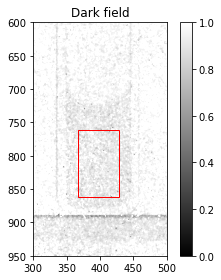

In [20]:
fig, ax = plt.subplots(figsize=(4,4))
plt.title('Dark field')
plt.imshow(sample1_vis/ob_vis, cmap='gray')

import matplotlib.patches as patches
rect = patches.Rectangle((367, 761), 62, 101, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.xlim(300, 500); plt.ylim(950, 600)
plt.clim(0, 1)
plt.colorbar()
plt.tight_layout()

# Compute all

In [21]:
files = glob.glob("/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/*.hdf")

In [22]:
sample_files = sorted(files)[:]
#sample_files

In [23]:
sample_vis_images = {}
for f in sample_files:
    print(f)
    sample1data = h5py.File(f)['entry']['data']['data']
    k = os.path.basename(f)
    k = k.split('000')[-1].rstrip('.hdf')
    print(k)
    try:
        o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
    except:
        print(f"{f}: failed")
        sample_vis_images[k] = None
        continue
    # sample1_phase = np.arctan2(-a_c1, a_s1)
    a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
    sample1_phase = np.arctan2(-a_c1, a_s1)
    sample1_vis = a1/o1
    sample_vis_images[k]=sample1_vis

/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000458.hdf
458
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000460.hdf
460
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000462.hdf
462
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000464.hdf
464
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000466.hdf
466
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000468.hdf
468
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000470.hdf
470
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000472.hdf
472
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000474.hdf
474
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000477.hdf
477
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03_samples_2_6/Sample6/boa2021n000479.hdf
479
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/03

In [24]:
keys = sorted(list(sample_vis_images.keys()))
len(keys)

18

In [25]:
Ls = [145-np.array(h5py.File(f)['entry/table5/sgtz']).mean()+6 for f in sample_files] # in mm
Ls = np.array(Ls)*1e-3 # in m
Ls*100

array([ 0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.6,  6.6,
        7.6,  8.6,  9.6, 10.6, 11.6, 12.6, 15.1])

In [26]:
wl = 2.8e-10
wl = 3.75e-10
p = 13e-6
p = 25e-6
xi = wl*Ls/p
xi*1e6

array([0.09 , 0.165, 0.24 , 0.315, 0.39 , 0.465, 0.54 , 0.615, 0.69 ,
       0.84 , 0.99 , 1.14 , 1.29 , 1.44 , 1.59 , 1.74 , 1.89 , 2.265])

In [27]:
# sl = slice(761,862), slice(367, 429)
# sl = slice(745, 870), slice(360, 440)
sl = slice(790, 830), slice(380, 416)
obv = np.mean(ob_vis[sl])

sv = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sv.append(np.mean(im[sl]))
    else:
        sv.append(None)

x = []; y = []
for x1,y1 in zip(xi, sv):
    if y1 is None: continue
    x.append(x1)
    y.append(y1)
x = np.array(x)
y = np.array(y)

y/obv

array([0.98225143, 0.92059995, 0.91652224, 0.92909572, 0.90069292,
       0.84920625, 0.80136169, 0.75658169, 0.72436144, 0.68851218,
       0.66458998, 0.63937322, 0.61294253, 0.57607707, 0.58054334,
       0.57382741, 0.57304261])

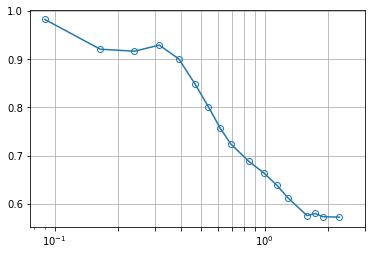

In [28]:
plt.figure()
plt.plot(x*1e6, y/obv, 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()

In [29]:
lnVs_over_V0_divby_lambdasq = np.log(y/obv)/wl/wl

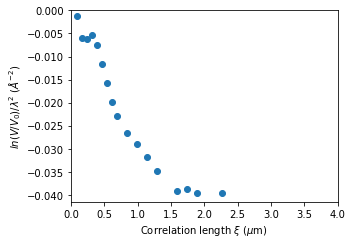

In [30]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 4)
plt.ylim(None, 0)
plt.tight_layout()

# Normalize by background near the sample

In [31]:
sample_bg_sl = slice(761,862), slice(470, 470+62)

sample_bg_v = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sample_bg_v.append(np.mean(im[sample_bg_sl]))
    else:
        sample_bg_v.append(None)

sample_bg_y = []
for y1, sample_bg_y1 in zip(sv, sample_bg_v):
    if y1 is None: continue
    sample_bg_y.append(sample_bg_y1)
sample_bg_y = np.array(sample_bg_y)

sample_bg_y/obv

array([0.98150827, 0.93222508, 0.946015  , 0.97833872, 0.97504634,
       0.96153248, 0.93807405, 0.9343228 , 0.93167297, 0.97010482,
       0.99505973, 1.0031748 , 1.00298741, 0.99919581, 1.00510307,
       0.99925887, 1.00671771])

Text(0, 0.5, '$V/V_0$')

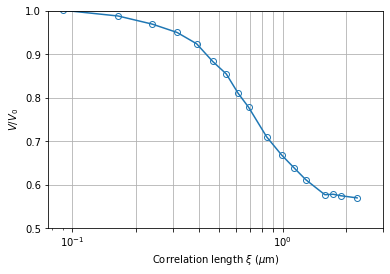

In [32]:
plt.figure()
plt.plot(x*1e6, (y/obv)/(sample_bg_y/obv), 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()
plt.ylim(0.5, 1)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
# plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.ylabel(r'$V/V_0$')

In [33]:
lnVs_over_V0_divby_lambdasq = np.log((y/obv)/(sample_bg_y/obv))/wl/wl

In [51]:
lnVs_over_V0 = np.log((y/obv)/(sample_bg_y/obv))

In [52]:
np.savetxt("lnVs_over_V0-sample6.dat", np.array([x*1e6, lnVs_over_V0]).T)

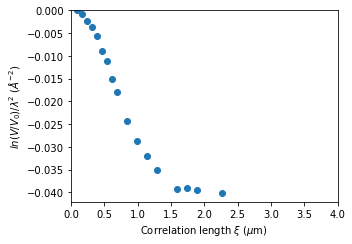

In [34]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 4)
plt.ylim(None, 0)
plt.tight_layout()

Matteo corrected thickness to 2mm, and radius to 1micron

In [35]:
t = 2e-3
r = 1e-6
phi = 0.117
delta_rho = 129e12

In [37]:
def G(zeta):
    zeta2 = zeta*zeta
    return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))

/tmp/ipykernel_3748125/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


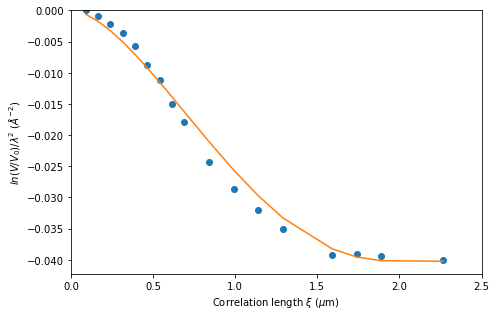

In [50]:
t = 3.1e-3
r = 1e-6
phi = 0.117
delta_rho = 129e12

plt.figure(figsize=(7,4.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
G1 = G(x/r)
G1[G1!=G1]=0
plt.plot(x*1e6, (2/3.)*phi*delta_rho*delta_rho*t*1e-20*r*(G1-1))
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 2.5)
plt.ylim(None, 0)
plt.tight_layout()

In [65]:
G_minus_one = lnVs_over_V0_divby_lambdasq/(3./2)/phi/delta_rho/delta_rho/r/t

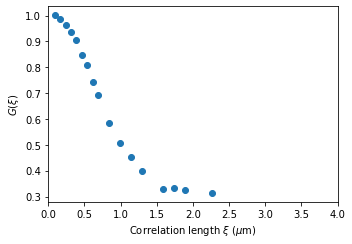

In [66]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, G_minus_one+1, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$G(\xi)$')
plt.xlim(0, 4)
plt.tight_layout()

## The correlation function

In [68]:
zetas = np.linspace(1e-3, 3, 100)

/tmp/ipykernel_1898254/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


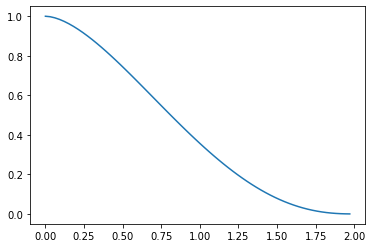

In [69]:
plt.figure()
plt.plot(zetas, G(zetas))

In [70]:
G(2.1)

/tmp/ipykernel_1898254/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


nan

## Fitting

/tmp/ipykernel_1898254/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


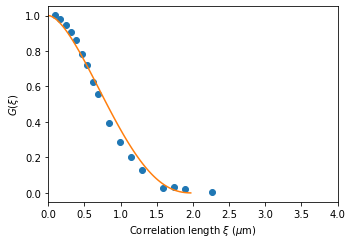

In [71]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, G_minus_one*1.45+1, 'o')
plt.plot(zetas*r*1e6, G(zetas))
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$G(\xi)$')
plt.xlim(0, 4)
plt.tight_layout()